In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

import pandas as pd 
import numpy as np 
from scipy.sparse import load_npz, csr_matrix


# rearrange the rows and columns such that the checkboard structure is shown. Does not require that the rows and columns are exclusive, i.e. each row and each column can only belong to one cluster on the other side

consensus score: 1.0


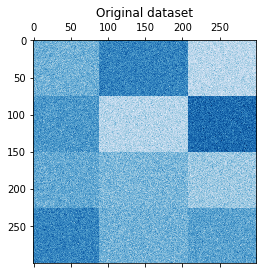

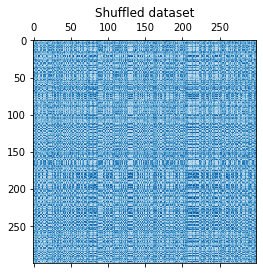

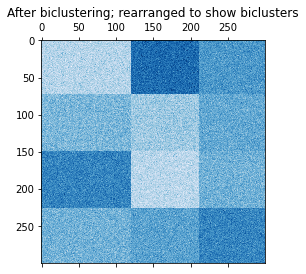

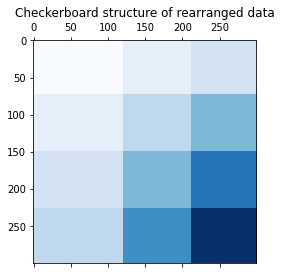

In [2]:
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.1f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data")

plt.show()

In [1]:
gxr = load_npz("BMMC/GxR.npz").todense().astype(np.float)

for n_clusters in range(3,10):
    fig = plt.figure(figsize=(20,10))
    axs = fig.subplots(1,3)
    axs[0].matshow(gxr, cmap=plt.cm.Blues)
    axs[0].set_title("Shuffled dataset")
    # too sparse, the method will not work
    model = SpectralBiclustering(n_clusters=(n_clusters, n_clusters), method='bistochastic', random_state=0)
    model.fit(gxr)
    # rows and columns, like ground truth
    # score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))
    # print("consensus score: {:.1f}".format(score))

    fit_data = gxr[np.argsort(model.row_labels_)]
    fit_data = gxr[:, np.argsort(model.column_labels_)]

    axs[1].matshow(fit_data, cmap=plt.cm.Blues)
    axs[1].set_title("After biclustering; rearranged to show biclusters")

    axs[2].matshow(np.outer(np.sort(model.row_labels_) + 1,
                        np.sort(model.column_labels_) + 1),
                cmap=plt.cm.Blues)
    plt.title("Checkerboard structure of rearranged data")

    fig.savefig("cluster_" + str(n_clusters) + ".png")
    plt.show()

NameError: name 'load_npz' is not defined

In [ ]:
from scipy.linalg import svd

gxr = load_npz("BMMC/GxR.npz")
k = 5
U, s, Vh = svd(gxr)
S = np.diag(s[:k])
gxr = np.dot(U[:,:k], np.dot(S, Vh[:k,:]))

In [ ]:
for n_clusters in range(3,10):
    fig = plt.figure(figsize=(20,10))
    axs = fig.subplots(1,3)
    axs[0].matshow(gxr, cmap=plt.cm.Blues)
    axs[0].set_title("Shuffled dataset")
    # too sparse, the method will not work
    model = SpectralBiclustering(n_clusters=(n_clusters, n_clusters), method='bistochastic', random_state=0)
    model.fit(gxr)
    # rows and columns, like ground truth
    # score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))
    # print("consensus score: {:.1f}".format(score))

    fit_data = gxr[np.argsort(model.row_labels_)]
    fit_data = gxr[:, np.argsort(model.column_labels_)]

    axs[1].matshow(fit_data, cmap=plt.cm.Blues)
    axs[1].set_title("After biclustering; rearranged to show biclusters")

    axs[2].matshow(np.outer(np.sort(model.row_labels_) + 1,
                        np.sort(model.column_labels_) + 1),
                cmap=plt.cm.Blues)
    plt.title("Checkerboard structure of rearranged data")

    fig.savefig("cluster_" + str(n_clusters) + ".png")
    plt.show()